In [220]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [221]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [222]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images = images / 255
images.shape

(20, 784)

In [223]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [224]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [225]:
def get_discount_matrix(size, rev = False, cor_supr_size=0):
    a = np.arange(size)
    if rev:
        a = np.abs(np.abs(a - a[np.newaxis].T) - np.max(a))
    else:
        a = np.abs(a - a[np.newaxis].T)
    np.fill_diagonal(a, 0)

    if cor_supr_size > 0:
        a[:cor_supr_size] = 0
        a[:, 0:cor_supr_size] = 0
        a[-cor_supr_size:] = 0
        a[:, -cor_supr_size:] = 0

    return a

# a = get_discount_matrix(10, rev=True, cor_supr_size=2)
# a = np.array(a, dtype='float')
# # a[:, 0:2] = 0
# print(a)
# show_image(a, cmap='Greys')

In [226]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

0.4668929164854446 -0.44338887259965376
prev_diff=191.31565791878492
prev_diff=567.3375091154767
prev_diff=57.764799284547465
prev_diff=68.59184615793748
prev_diff=30.958958029060803
prev_diff=22.978311325626585
prev_diff=142.63758840344434
prev_diff=115.82598462731532
prev_diff=164.87305308712683
prev_diff=179.93925967131747
prev_diff=162.7208896372155
prev_diff=169.95115131894727
prev_diff=205.81897898517576
prev_diff=216.07234608679462
prev_diff=223.05529526553153
prev_diff=232.18383118544222
prev_diff=255.33686477337946
prev_diff=264.2024612580798
prev_diff=278.3100671269057
prev_diff=285.85176644567
prev_diff=302.6157807211042
prev_diff=308.74035774268555
prev_diff=320.536028525
prev_diff=325.0984316185384
prev_diff=334.9407021614205
prev_diff=338.154593932643
prev_diff=344.6125286000647
prev_diff=346.77607124758805
prev_diff=351.26760230786726
prev_diff=352.7414008129001
prev_diff=355.5600238362639
prev_diff=356.50705891053576
prev_diff=358.23713545734614
prev_diff=358.8431524761

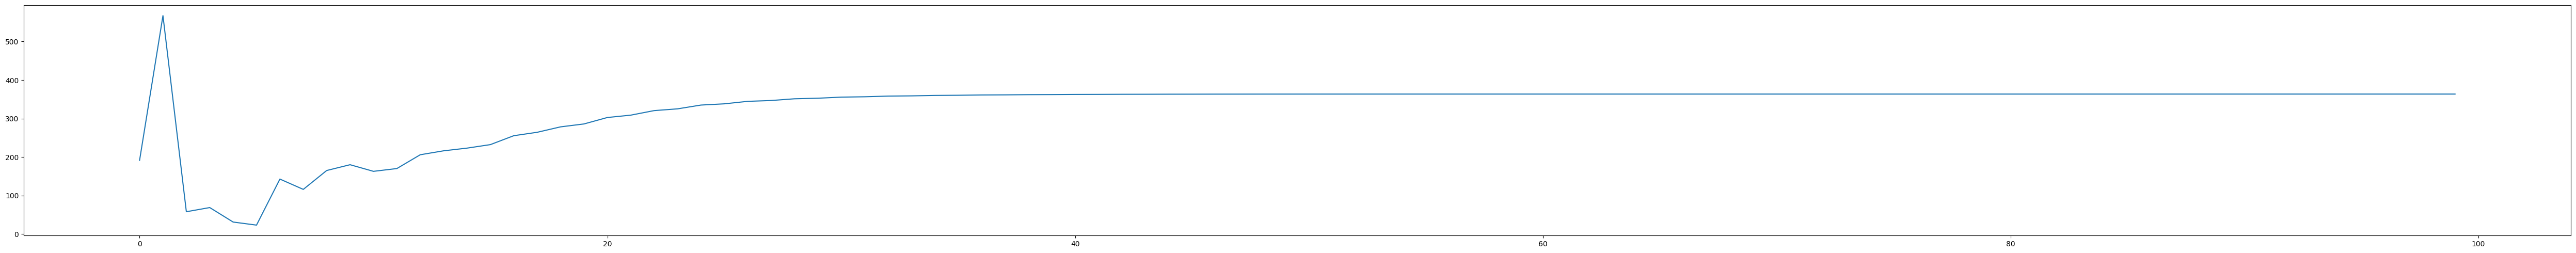

last_iter=100
prev_diff=384.5412688305328
prev_diff=364.61989309415844
prev_diff=112.67211136784621
prev_diff=112.58025661938869
prev_diff=371.6059499737919
prev_diff=371.7525142692697
prev_diff=348.79693110319477
prev_diff=348.77559982720936
prev_diff=351.71441192802945
prev_diff=351.7161930928653
prev_diff=351.01478904711155
prev_diff=351.0143943423285
prev_diff=351.2111400590933
prev_diff=351.2112477054763
prev_diff=351.1545786099557
prev_diff=351.1545476609723
prev_diff=351.17092226869744
prev_diff=351.170931208641
prev_diff=351.1661985804734
prev_diff=351.1661959969401
prev_diff=351.1675639110721
prev_diff=351.16756465796107
prev_diff=351.16716928154756
prev_diff=351.1671690657528
prev_diff=351.16728334416405
prev_diff=351.16728340658415
prev_diff=351.1672503760667
prev_diff=351.1672503580518
prev_diff=351.1672599051209
prev_diff=351.16725991034343
prev_diff=351.167257150923
prev_diff=351.16725714942197
prev_diff=351.1672579470118
prev_diff=351.16725794745037
prev_diff=351.1672577

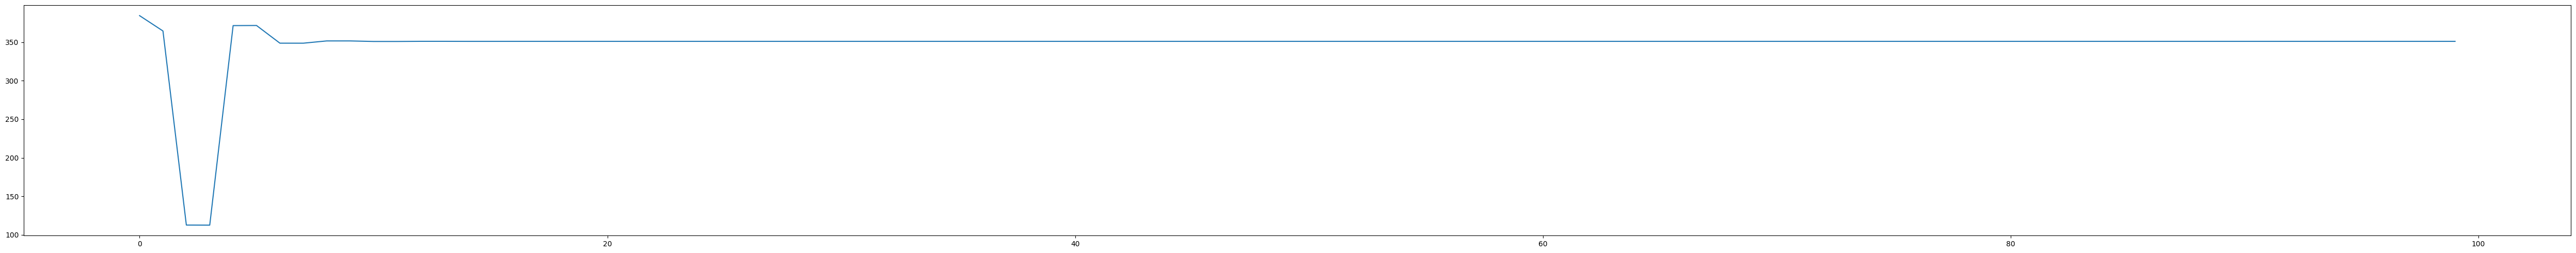

last_iter=100
0.029406282952444407


In [259]:
I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

# W = np.random.rand(O.size, I.size) - 0.5
W = np.random.normal(0, 0.1, (O.size, I.size))
print(W.max(), W.min())

train_images_idx = [0, 10]

img_out = []

for img_idx in train_images_idx:
    I = images[img_idx]

    O.fill(0)

    out = []

    last_iter = 0
    
    for iter_idx in range(100):
        # show_image(image=I.reshape(img_side, img_side))

        SO = I * W
        dO = np.sum(SO, axis=1)

        O += dO

        O *= (O > 0)

        O /= np.max(O)

        prev_diff = np.abs(I - O).sum()
        out.append(prev_diff)
        # out.append((O > 0).sum())
        # out.append(np.mean(O))

        print(f'{prev_diff=}')


        dW = I - W * O[np.newaxis].T
        dW /= np.max(np.abs(dW)) + 1e-50

        W += dW

        
        last_iter += 1

        if prev_diff < 5:
            break

        # recur
        I = np.copy(O)
    
    img_out.append(np.copy(O))

    simple_plot(T=out)
    print(f'{last_iter=}')

diff = np.abs(img_out[0] - img_out[1]).sum()
print(diff)

In [254]:
out_arr = np.array(out)
out_arr.min()

91.60257919987836